<a href="https://colab.research.google.com/github/strillas/my-first-project/blob/master/Project_TrenMax_en_clase_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MASTER DATA SCIENCE: NUCLIO
## PROFESOR: JOSEPH GALLART
## PROJECT TRENMAX 1/2

In [72]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
#importamos librería
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,MinMaxScaler

import folium
import plotly.express as px

In [ ]:
#LEEMOS EL FICHERO DE RENFE

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
df_renfe = pd.read_csv('/content/drive/MyDrive/renfe.csv')

In [119]:
df_renfe

,FECHA_CONSULTA,FECHA_INICIO,FECHA_FIN,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO
0,2019-05-25 01:43:03,2019-06-28 20:36:00,2019-06-28 23:14:00,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20
1,2019-06-22 13:05:11,2019-07-14 10:00:00,2019-07-14 13:10:00,BARCELONA,MADRID,AVE,Flexible,Turista,107.70
2,2019-04-17 06:24:03,2019-05-23 13:40:00,2019-05-23 16:10:00,SEVILLA,MADRID,AVE,Promo,Turista,47.30
3,2019-05-10 21:21:59,2019-05-29 14:50:00,2019-05-29 22:30:00,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35
4,2019-05-09 19:43:37,2019-06-26 13:25:00,2019-06-26 16:24:00,MADRID,BARCELONA,AVE-TGV,Promo,Turista,66.75
...,...,...,...,...,...,...,...,...,...
383563,2019-05-06 05:11:53,2019-05-10 19:40:00,2019-05-10 21:29:00,MADRID,VALENCIA,AVE,Flexible,NaN,73.10
383564,2019-06-19 21:48:56,2019-08-05 20:00:00,2019-08-05 23:10:00,BARCELONA,MADRID,AVE,Promo,Preferente,54.45
383565,2019-04-24 23:21:44,2019-04-29 16:15:00,2019-04-29 17:55:00,VALENCIA,MADRID,AVE,Promo,Turista,27.80
383566,2019-05-27 21:05:19,2019-07-07 15:00:00,2019-07-07 17:21:00,MADRID,SEVILLA,AVE,Promo,NaN,47.30


In [ ]:
#PREGUNTA 1

In [74]:
df_renfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383568 entries, 0 to 383567
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   FECHA_CONSULTA  383568 non-null  object 
 1   FECHA_INICIO    383568 non-null  object 
 2   FECHA_FIN       383568 non-null  object 
 3   CIUDAD_ORIGEN   383568 non-null  object 
 4   CIUDAD_DESTINO  383568 non-null  object 
 5   TIPO_TREN       345211 non-null  object 
 6   TIPO_TARIFA     344009 non-null  object 
 7   CLASE           344000 non-null  object 
 8   PRECIO          355038 non-null  float64
dtypes: float64(1), object(8)
memory usage: 26.3+ MB


In [110]:
df_renfe.head()

,FECHA_CONSULTA,FECHA_INICIO,FECHA_FIN,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO
0,2019-05-25 01:43:03,2019-06-28 20:36:00,2019-06-28 23:14:00,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20
1,2019-06-22 13:05:11,2019-07-14 10:00:00,2019-07-14 13:10:00,BARCELONA,MADRID,AVE,Flexible,Turista,107.70
2,2019-04-17 06:24:03,2019-05-23 13:40:00,2019-05-23 16:10:00,SEVILLA,MADRID,AVE,Promo,Turista,47.30
3,2019-05-10 21:21:59,2019-05-29 14:50:00,2019-05-29 22:30:00,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35
4,2019-05-09 19:43:37,2019-06-26 13:25:00,2019-06-26 16:24:00,MADRID,BARCELONA,AVE-TGV,Promo,Turista,66.75


In [ ]:
df_renfe.isnull().sum()

FECHA_CONSULTA        0
FECHA_INICIO          0
FECHA_FIN             0
CIUDAD_ORIGEN         0
CIUDAD_DESTINO        0
TIPO_TREN         38357
TIPO_TARIFA       39559
CLASE             39568
PRECIO            28530
dtype: int64

In [77]:
df_renfe2=df_renfe.copy()

In [ ]:
#PREGUNTA 2

In [78]:
lista_fecha = ["FECHA_CONSULTA", "FECHA_INICIO", "FECHA_FIN"]

In [79]:
for i in lista_fecha:
  df_renfe2[i]= pd.to_datetime(df_renfe2[i])

In [ ]:
#PREGUNTA 3

In [80]:
df_renfe2.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
383563    False
383564    False
383565    False
383566    False
383567    False
Length: 383568, dtype: bool

In [81]:
len (df_renfe2[df_renfe2.duplicated()])

24

In [ ]:
#PREGUNTA 4

In [82]:
df_renfe2.drop_duplicates(inplace=True)

In [83]:
df_renfe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383544 entries, 0 to 383567
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   FECHA_CONSULTA  383544 non-null  datetime64[ns]
 1   FECHA_INICIO    383544 non-null  datetime64[ns]
 2   FECHA_FIN       383544 non-null  datetime64[ns]
 3   CIUDAD_ORIGEN   383544 non-null  object        
 4   CIUDAD_DESTINO  383544 non-null  object        
 5   TIPO_TREN       345187 non-null  object        
 6   TIPO_TARIFA     343990 non-null  object        
 7   CLASE           343981 non-null  object        
 8   PRECIO          355028 non-null  float64       
dtypes: datetime64[ns](3), float64(1), object(5)
memory usage: 29.3+ MB


In [84]:
df_renfe2["tiempo_viaje"] = (df_renfe2["FECHA_FIN"] - df_renfe2["FECHA_INICIO"])/np.timedelta64(1,'m')

In [85]:
df_renfe2["Dif_Ini_Bus"] = (df_renfe2["FECHA_INICIO"] - df_renfe2["FECHA_CONSULTA"])/np.timedelta64(1,'m')

In [86]:
df_renfe2["Dif_Ini_Bus"]

0         50092.950000
1         31494.816667
2         52275.950000
3         26968.016667
4         68741.383333
              ...     
383563     6628.116667
383564    67571.066667
383565     6773.266667
383566    58674.683333
383567    29010.766667
Name: Dif_Ini_Bus, Length: 383544, dtype: float64

In [ ]:
#PREGUNTA 5

In [87]:
for col in ['FECHA_CONSULTA', 'FECHA_INICIO', 'FECHA_FIN']:
    df_renfe2[col + '_HORA'] = df_renfe2[col].dt.hour
    df_renfe2[col + '_NOMBREDIA'] = df_renfe2[col].dt.day_name()
    ##O .dt.weekday_name
    df_renfe2[col + '_DIA'] = df_renfe2[col].dt.day
    df_renfe2[col + '_MES'] = df_renfe2[col].dt.month

    del df_renfe2[col]

df_renfe2.head()

,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO,tiempo_viaje,Dif_Ini_Bus,FECHA_CONSULTA_HORA,FECHA_CONSULTA_NOMBREDIA,FECHA_CONSULTA_DIA,FECHA_CONSULTA_MES,FECHA_INICIO_HORA,FECHA_INICIO_NOMBREDIA,FECHA_INICIO_DIA,FECHA_INICIO_MES,FECHA_FIN_HORA,FECHA_FIN_NOMBREDIA,FECHA_FIN_DIA,FECHA_FIN_MES
0,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20,158.0,50092.950000,1,Saturday,25,5,20,Friday,28,6,23,Friday,28,6
1,BARCELONA,MADRID,AVE,Flexible,Turista,107.70,190.0,31494.816667,13,Saturday,22,6,10,Sunday,14,7,13,Sunday,14,7
2,SEVILLA,MADRID,AVE,Promo,Turista,47.30,150.0,52275.950000,6,Wednesday,17,4,13,Thursday,23,5,16,Thursday,23,5
3,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35,460.0,26968.016667,21,Friday,10,5,14,Wednesday,29,5,22,Wednesday,29,5
4,MADRID,BARCELONA,AVE-TGV,Promo,Turista,66.75,179.0,68741.383333,19,Thursday,9,5,13,Wednesday,26,6,16,Wednesday,26,6


In [ ]:
#PREGUNTA 6

In [88]:
df_renfe2["PRECIO"].isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
383563    False
383564    False
383565    False
383566    False
383567    False
Name: PRECIO, Length: 383544, dtype: bool

In [89]:
df_renfe2["PRECIO"].isnull().sum()

28516

In [90]:
df_renfe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383568 entries, 0 to 383567
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   FECHA_CONSULTA  383568 non-null  object 
 1   FECHA_INICIO    383568 non-null  object 
 2   FECHA_FIN       383568 non-null  object 
 3   CIUDAD_ORIGEN   383568 non-null  object 
 4   CIUDAD_DESTINO  383568 non-null  object 
 5   TIPO_TREN       345211 non-null  object 
 6   TIPO_TARIFA     344009 non-null  object 
 7   CLASE           344000 non-null  object 
 8   PRECIO          355038 non-null  float64
dtypes: float64(1), object(8)
memory usage: 26.3+ MB


In [ ]:
#PREGUNTA 7

In [91]:
df_renfe3 = df_renfe2.copy()

In [92]:
df_renfe3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383544 entries, 0 to 383567
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   CIUDAD_ORIGEN             383544 non-null  object 
 1   CIUDAD_DESTINO            383544 non-null  object 
 2   TIPO_TREN                 345187 non-null  object 
 3   TIPO_TARIFA               343990 non-null  object 
 4   CLASE                     343981 non-null  object 
 5   PRECIO                    355028 non-null  float64
 6   tiempo_viaje              383544 non-null  float64
 7   Dif_Ini_Bus               383544 non-null  float64
 8   FECHA_CONSULTA_HORA       383544 non-null  int64  
 9   FECHA_CONSULTA_NOMBREDIA  383544 non-null  object 
 10  FECHA_CONSULTA_DIA        383544 non-null  int64  
 11  FECHA_CONSULTA_MES        383544 non-null  int64  
 12  FECHA_INICIO_HORA         383544 non-null  int64  
 13  FECHA_INICIO_NOMBREDIA    383544 non-null  o

In [93]:
df_renfe3["CLASE"].isnull().sum()

39563

In [94]:
df_renfe3["CLASE"].value_counts()

Turista                     261731
Preferente                   33963
Turista Plus                 24347
Turista con enlace           20866
TuristaSólo plaza H           2477
PreferenteSólo plaza H         317
Cama Turista                   263
Cama G. Clase                   15
Turista PlusSólo plaza H         2
Name: CLASE, dtype: int64

In [95]:
df_renfe3["TIPO_TREN"].value_counts()

AVE          236293
ALVIA         27231
INTERCITY     17827
REGIONAL      16817
AV City        9754
MD-LD          7475
LD             5905
AVE-TGV        4593
R. EXPRES      4165
TRENHOTEL      3956
AVE-LD         3505
AVE-MD         2955
LD-MD          2793
MD-AVE          871
MD              548
LD-AVE          499
Name: TIPO_TREN, dtype: int64

In [ ]:
df_renfe3["TIPO_TARIFA"].value_counts()

Promo                      239839
Flexible                    74133
Adulto ida                  21624
Promo +                      8222
COD.PROMOCIONAL               148
Individual-Flexible            11
Mesa                            8
Doble Familiar-Flexible         3
4x100                           1
Grupos Ida                      1
Name: TIPO_TARIFA, dtype: int64

In [96]:
df_renfe3[(df_renfe3["TIPO_TARIFA"].isnull()) & (df_renfe3["TIPO_TREN"].isnull()) & (df_renfe3["CLASE"].isnull())]

,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO,tiempo_viaje,Dif_Ini_Bus,FECHA_CONSULTA_HORA,FECHA_CONSULTA_NOMBREDIA,FECHA_CONSULTA_DIA,FECHA_CONSULTA_MES,FECHA_INICIO_HORA,FECHA_INICIO_NOMBREDIA,FECHA_INICIO_DIA,FECHA_INICIO_MES,FECHA_FIN_HORA,FECHA_FIN_NOMBREDIA,FECHA_FIN_DIA,FECHA_FIN_MES
1716,MADRID,BARCELONA,NaN,NaN,NaN,NaN,150.0,52177.750000,15,Sunday,12,5,21,Monday,17,6,23,Monday,17,6
3278,MADRID,BARCELONA,NaN,NaN,NaN,68.95,190.0,65510.400000,7,Friday,7,6,19,Monday,22,7,22,Monday,22,7
4228,SEVILLA,MADRID,NaN,NaN,NaN,53.40,160.0,45733.500000,13,Saturday,17,8,7,Wednesday,18,9,9,Wednesday,18,9
4663,BARCELONA,MADRID,NaN,NaN,NaN,85.10,190.0,52611.333333,21,Saturday,25,5,10,Monday,1,7,13,Monday,1,7
5291,MADRID,SEVILLA,NaN,NaN,NaN,53.40,150.0,67137.716667,1,Tuesday,18,6,16,Saturday,3,8,18,Saturday,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378017,VALENCIA,MADRID,NaN,NaN,NaN,21.95,100.0,70193.000000,1,Saturday,1,6,19,Friday,19,7,20,Friday,19,7
378637,PONFERRADA,MADRID,NaN,NaN,NaN,NaN,300.0,4412.116667,16,Friday,19,4,17,Monday,22,4,22,Monday,22,4
381265,MADRID,SEVILLA,NaN,NaN,NaN,60.30,152.0,26410.883333,5,Sunday,21,4,14,Thursday,9,5,16,Thursday,9,5
382878,BARCELONA,MADRID,NaN,NaN,NaN,43.25,544.0,939.383333,17,Friday,21,6,9,Saturday,22,6,18,Saturday,22,6


In [97]:
df_renfe4 = df_renfe3.copy()

In [98]:
df_renfe4["PRECIO"].isnull().sum()

28516

In [99]:
df_renfe4.dropna(subset=["PRECIO"], inplace=True)

In [100]:
df_renfe4["TIPO_TREN"].fillna("SIN_CATEGORIA", inplace=True)

In [101]:
lista_nulos =["TIPO_TREN","TIPO_TARIFA","CLASE"]

In [102]:
for i in lista_nulos:
  df_renfe4[i].fillna('Sin valor', inplace=True)

In [ ]:
#PREGUNTA 8

In [103]:
target = ['PRECIO']
def obtener_lista_variables(dataset):
  lista_num = []
  lista_bool = []
  lista_cat = []
  for i in dataset:
    if ((dataset[i].dtype.kind=='i') or (dataset[i].dtype.kind=='f')) and i not in target and len(dataset[i].unique())!=2 :
      lista_num.append(i)
    elif ((dataset[i].dtype.kind=='i')) and i not in target and len(dataset[i].unique())==2:
      lista_bool.append(i)
    elif ((dataset[i].dtype.kind=='O') ) and i not in target:
      lista_cat.append(i)
  return lista_num, lista_bool, lista_cat



In [ ]:
#PREGUNTA 9

A. ¿Cuál es la fecha mínima y máxima de consulta de las simulaciones?

In [120]:
fecha_minima = df_renfe4['FECHA_CONSULTA'].min()

KeyError: ignored

In [104]:
print("Fecha mínima de consulta:", fecha_minima)

Fecha mínima de consulta: 2019-04-11 21:49:46


In [114]:
fecha_maxima = df_renfe['FECHA_CONSULTA'].max()

In [43]:
print("Fecha máxima de consulta:", fecha_maxima)

Fecha máxima de consulta: 2019-08-22 19:06:26


B. ¿Cuál es el precio mímino, máximo y medio del billete?

In [46]:
precio_minimo = df_renfe4['PRECIO'].min()

In [47]:

print("Precio mínimo:", precio_minimo)

Precio mínimo: 0.0


In [48]:
precio_maximo = df_renfe4['PRECIO'].max()

In [50]:
print("Precio maximo:", precio_maximo)

Precio maximo: 342.8


<Axes: >

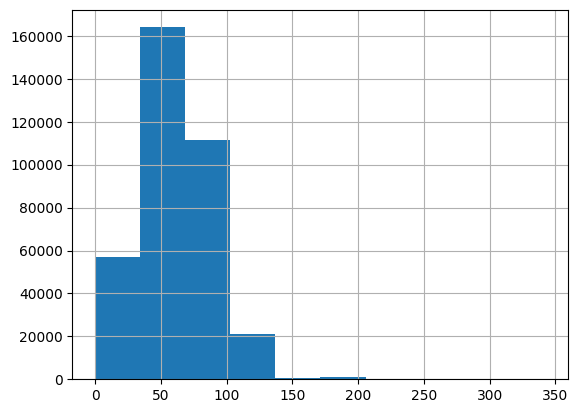

In [115]:
df_renfe4["PRECIO"].hist()

In [59]:
precio_medio = df_renfe4['PRECIO'].mean()

In [105]:
print("El precio medio es:", precio_medio)

El precio medio es: 61.435680763207436


C. ¿Cuántas rutas se simularon en el mes de agosto de 2019?

In [ ]:
#Sobre: "FECHA_CONSULTA"

In [118]:
simulaciones = df_renfe[(df_renfe['FECHA_CONSULTA'].dt.month == 8) & (df_renfe["FECHA_CONSULTA"].dt.year == 2019)]

AttributeError: ignored

In [65]:
numero_rutas = len(simulaciones)

In [66]:
numero_rutas

44363

¿Cuántas rutas se simularon que la duración del viaje sea superior a 4 horas?

<Axes: >

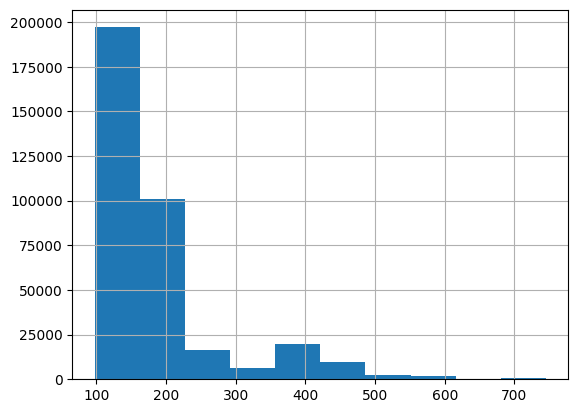

In [121]:
df_renfe4["tiempo_viaje"].hist()

In [122]:
duracion_superior_4 = df_renfe4[df_renfe4['tiempo_viaje'] > 4]

In [123]:
numero_rutas_sup_4h = len(duracion_superior_4)

In [125]:
"Num de rutas con duración de viaje superior a 4 horas:", numero_rutas_sup_4h

('Num de rutas con duración de viaje superior a 4 horas:', 355028)

In [127]:
numero_rutas = len(df_renfe)
print("Número de rutas simuladas:", numero_rutas)

Número de rutas simuladas: 383568


In [128]:
numero_rutas = len(duracion_superior_4)
print("Número de rutas simuladas:", numero_rutas)

Número de rutas simuladas: 355028


E. ¿Puedes decir cuál es la ciudad que menos simulaciones se han hecho como origen y cuántas simulaciones fueron?

F. Calcular la clase más barata y la clase más cara

In [133]:
df_renfe4["CLASE"].value_counts()

Turista                     243860
Sin valor                    35554
Preferente                   30713
Turista Plus                 23320
Turista con enlace           19114
TuristaSólo plaza H           1951
PreferenteSólo plaza H         259
Cama Turista                   240
Cama G. Clase                   15
Turista PlusSólo plaza H         2
Name: CLASE, dtype: int64

In [131]:
df_renfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383568 entries, 0 to 383567
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   FECHA_CONSULTA  383568 non-null  object 
 1   FECHA_INICIO    383568 non-null  object 
 2   FECHA_FIN       383568 non-null  object 
 3   CIUDAD_ORIGEN   383568 non-null  object 
 4   CIUDAD_DESTINO  383568 non-null  object 
 5   TIPO_TREN       345211 non-null  object 
 6   TIPO_TARIFA     344009 non-null  object 
 7   CLASE           344000 non-null  object 
 8   PRECIO          355038 non-null  float64
dtypes: float64(1), object(8)
memory usage: 26.3+ MB


In [132]:
df_renfe.describe()

,PRECIO
count,355038.000000
mean,61.435380
std,25.695934
min,0.000000
25%,41.200000
50%,58.150000
75%,76.300000
max,342.800000


G. Calcular la tarifa más cara en el mes de viaje en septiembre de 2019

H. ¿En promedio cuál es el tipo de tren más barato y de cuánto?

I. ¿Cuántas rutas se simularon entre origen MADRID y destino BARCELONA?

J. En promedio ¿Cuál es el mes más barato para viajar desde BARCELONA a MADRID en AVE y de cuánto?

In [130]:
df_renfe4["TIPO_TREN"].value_counts()

AVE              226696
SIN_CATEGORIA     35443
ALVIA             19043
REGIONAL          16591
INTERCITY         16431
AV City            9214
MD-LD              6779
AVE-TGV            4456
R. EXPRES          4131
TRENHOTEL          3789
LD                 3649
AVE-LD             2857
AVE-MD             2351
LD-MD              2346
MD-AVE              763
MD                  489
Name: TIPO_TREN, dtype: int64

In [134]:

df_renfe4[(df_renfe4['TIPO_TREN']=='AVE') & (df_renfe4['CIUDAD_ORIGEN']=='BARCELONA') & (df_renfe4['CIUDAD_DESTINO']=='MADRID')]


,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO,tiempo_viaje,Dif_Ini_Bus,FECHA_CONSULTA_HORA,FECHA_CONSULTA_NOMBREDIA,FECHA_CONSULTA_DIA,FECHA_CONSULTA_MES,FECHA_INICIO_HORA,FECHA_INICIO_NOMBREDIA,FECHA_INICIO_DIA,FECHA_INICIO_MES,FECHA_FIN_HORA,FECHA_FIN_NOMBREDIA,FECHA_FIN_DIA,FECHA_FIN_MES
1,BARCELONA,MADRID,AVE,Flexible,Turista,107.70,190.0,31494.816667,13,Saturday,22,6,10,Sunday,14,7,13,Sunday,14,7
14,BARCELONA,MADRID,AVE,Promo,Turista,75.40,190.0,69171.483333,19,Wednesday,12,6,20,Tuesday,30,7,23,Tuesday,30,7
15,BARCELONA,MADRID,AVE,Sin valor,Turista,107.70,170.0,76428.266667,15,Saturday,18,5,17,Wednesday,10,7,19,Wednesday,10,7
22,BARCELONA,MADRID,AVE,Sin valor,Preferente,68.95,165.0,84214.200000,1,Saturday,8,6,13,Monday,5,8,16,Monday,5,8
39,BARCELONA,MADRID,AVE,Sin valor,Turista Plus,80.15,190.0,52125.300000,11,Sunday,19,5,16,Monday,24,6,19,Monday,24,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383514,BARCELONA,MADRID,AVE,Promo,Turista Plus,102.15,165.0,51957.316667,7,Thursday,18,4,9,Friday,24,5,11,Friday,24,5
383524,BARCELONA,MADRID,AVE,Sin valor,Turista,66.75,190.0,45882.183333,17,Sunday,12,5,14,Thursday,13,6,17,Thursday,13,6
383553,BARCELONA,MADRID,AVE,Promo,Turista Plus,90.50,190.0,32929.133333,21,Wednesday,24,4,18,Friday,17,5,21,Friday,17,5
383560,BARCELONA,MADRID,AVE,Sin valor,Turista,85.10,165.0,56996.133333,21,Thursday,1,8,11,Tuesday,10,9,13,Tuesday,10,9


In [ ]:
#PREGUNTA 10